# Chapter 2: Statistical Learning

## Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

## Advertising Data

The `Advertising` data set consist of the `sales` of that product in 200 different market, alongside with advertising budgets for product for three different media: 

&emsp; &emsp; &emsp; &emsp;- `TV` <br>
&emsp; &emsp; &emsp; &emsp;- `radio` <br>
&emsp; &emsp; &emsp; &emsp;- `newspaper` <br>
 

In [3]:
df_adv = pd.read_csv('data/Advertising.csv')
df_adv.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


We are trying to determine that there is an association between advertising and sales. The goal here is to develop an accurate model that can be used to predict sales on three media channel we have. 

To set up the problem, the `TV` , `Radio` , `Newspaper` are *`input variable`*, while `Sales` is an *`output variable`*.

The `input` variable are typically denoted by $ X_{p}$ , with a subscript to denote the number of input variable. $ X_{p}$ can be reffered as *predictors*, *independent variables*, *features* etc. The output variable - in this case `sales` - is called the *response* or *dependent variable*, and is denoted by `Y`. Let's look at the `Advertising` data set:

In [4]:
df_adv_melt = pd.melt(df_adv,value_vars=['TV','Radio','Newspaper'],id_vars=['Sales'],var_name='Type',value_name='budget')

df_adv_melt.head()

,Sales,Type,budget
0,22.1,TV,230.1
1,10.4,TV,44.5
2,9.3,TV,17.2
3,18.5,TV,151.5
4,12.9,TV,180.8


<AxesSubplot:xlabel='Newspaper', ylabel='Sales'>

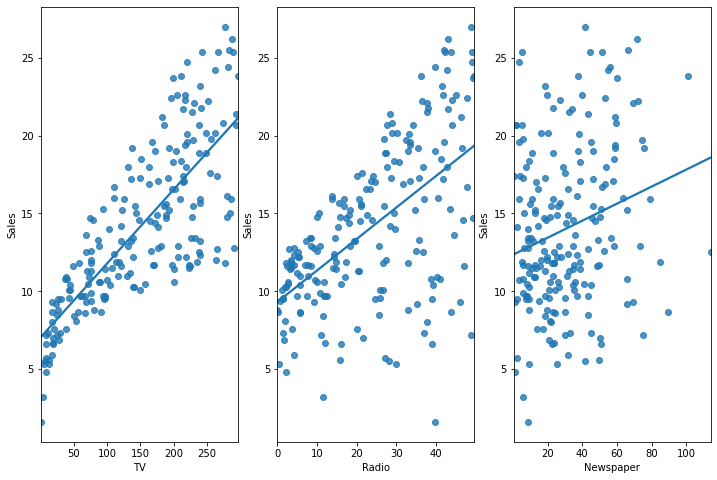

In [5]:
fig, axs = plt.subplots(ncols=3,figsize = (12,8))
sns.regplot(x='TV', y='Sales', data=df_adv, ax=axs[0],ci = None)
sns.regplot(x='Radio', y='Sales', data=df_adv, ax=axs[1],ci = None)
sns.regplot(x='Newspaper',y='Sales', data=df_adv, ax=axs[2],ci = None)

The plot above displays `Sales` in thousands of units as a function of `TV` , `Radio` , `Newspaper` budgets. In every plot we see that simple least squares fit of `Sales` to input variable. The blue line represents a simple model that can be used to predict `sales`. 

Mathematically, we observe a quantitative response $Y$ and $p$ different predictors, $X_{1}, X_{2}, X_{3} ...... X_{p}$. We assume there is a relationship between $Y$ and $X$ = ($X_{1}, X_{2}, X_{3} ...... X_{p}$),which can be written as:

$$Y = f(x) + \epsilon$$

Here $f$ is some fixed but unknown function of $X_{1}, X_{2}, X_{3} ...... X_{p}$ and $\epsilon$ is a random *error term*, which is independent of X and has mean equal to 0. 

Let's take another basic example:

In [6]:
df_random = sns.load_dataset("exercise")
df_random = df_random[['id','pulse']]

<AxesSubplot:xlabel='id', ylabel='pulse'>

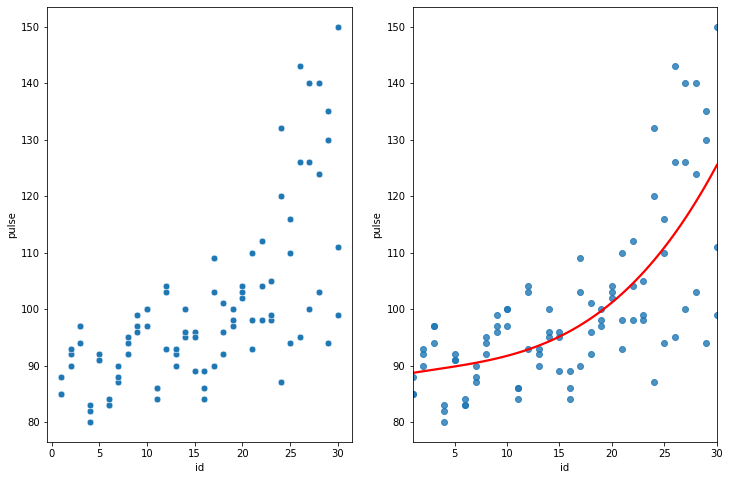

In [7]:
fig,ax = plt.subplots(ncols=2,nrows= 1,figsize = (12,8))
sns.scatterplot(data = df_random,x = 'id',y = 'pulse',ax = ax[0],s = 45)
sns.regplot(data = df_random,x = 'id',y = 'pulse',ax = ax[1],ci = False,order = 3, line_kws={"color": "red"})


The blue dots above are the observed values of `pulse` and `id` of participant in our hypothetical data. The red line represents the underlying relationship between `id` and `pulse`. The distance between *red line* and blue dots is the error associated with each observation. Note that some errors are positive (if an observation
lies above the blue curve) and some are negative (if an observation lies
below the curve). Overall, these errors have approximately mean zero.
<pre>
                   In essence, statistical learning refers to a set of approaches for estimating f.

</pre>

## Why Estimate $f$ ?

### 1. *Prediction*

A set of inputs $X$ are usually available in real life setting, but the output $Y$ cannot be easily obtained. Since, our assumptions are that error term average to 0, we can predict $Y$ using:

$$\hat{Y} = \hat{f}(X)$$

Here $\hat{f}$ represents our estimate for $f$, and $\hat{Y}$ represents the resulting prediction for $Y$. For now we will assume $\hat{f}$ as a *black box*, in the sense that one is not typically concerned with the exact form of $\hat{f}$, provided that it yeilds accurate predictions for $Y$.

The accuracy of $\hat{Y}$ as a prediction for $Y$ depends on two quantities:

    - Reducible error
    - Irreducible error
    
In general, $\hat{f}$ will not be perfect estimate of $f$, and this inaccuracy will be introduce some error.This error is *reducible* because we can potentially improve the accuracy of $\hat{f}$ by using the most appropriate statistical learning technique to estimate $f$. However, even if it were possible to form a perfect estimate for $f$, so that our estimated response took the form $\hat{Y} = \hat{f}(X)$, our prediction would still have some error in it. This is because $Y$ is also a function of $\epsilon$, which by defination cannot be predicted using $X$. Therefore, variability associated with $\epsilon$ also affects the accuracy of our predictions. This is known as the *irreducible error*. Mathamatically, consider a given estimate $\hat{f}$ and a set of predictors $X$, which yeilds $\hat{Y} = \hat{f}(X)$. Assume both $\hat{f}$ and $X$ are fixed, then:

\begin{equation} \begin{aligned} E(Y - \hat{Y}) = E[f(X) + \epsilon - \hat{f}(X)] ^2 \\  =\underbrace{[f(X) - \hat{f}(X)]^2}_{\text{Reducible}} + \underbrace{Var(\epsilon)}_{\text{irreducible}} \end{aligned}
\end{equation}

Here $[E(Y - \hat{Y})]$ represents the average or *expected value* of the squared differnce between the predicted value of $Y$, and $Var(\epsilon)$ represents the *variance* associated with the error term $\epsilon$

### 2. *Inference*




Now, we understand that $Y$ is affected as $X_1,.......,X_p$ changes. Now, our requirement changes from making prediction for $Y$ to estimate $f$. We want to understand relationship between $X$ and $Y$. Now, $\hat f$ cannot be treated as black box, but we need to know the *exact form*. Few questions to ask:

- which predictors are associated with the response?
- What is the relatioship between response and each predictor?
- Can the relationship between $Y$ and each predictor be summarized using linear equation?



## How do we estimate $f$?

There are many ways to estimate $f$, *linear* and *non-linear* appoaches for estimating $f$. These methods share certain characteristics. We will go through an overview of these shared characteristics in this section. 

Let's assume we have observed a set of *n* different data points. These observations are called the *training data* because we will use these **observed** data to train(or teach) our function(or estimate $\hat f$). 

Let $x_{ij}$ represent the value of the $j$th predictor, or input, for observation $i$, where $i$ = 1,2,3,......,$n$ and $j$ = 1,2,3,4,.......,$p$. Correspondingly, let $y_i$ represnt the response variable for $i$th observation. Then our training data consist of $${(x_1,y_1), (x_1,y_1),.........,(x_n,y_n)}$$ where $$x_i = (x_{i1},x_{i2},.....,x_{ip})^T$$

Our goal is to apply a statistical learning method to the training data in order to estimate th unknown function $f$. 

Broadly speaking, most statistical learning method can be either *parametric* or *non-parametric*.

### Parametric Methods

Parametric methods involves a two-step model-based approach:

- 1) First, we make an assumption about the functional form,or shapre of $f$. For example, one very simple assumption is that $f$ is linear in X:

$$f(X) = \beta_{0} + \beta_{1} * X_{1} + \beta_{1} * X_{1} + ...............+ \beta_{p} * X_{p}$$

This is a linear model. Once we have assumed that $f$ is linear, the problem of estimating $f$ is simplified. Instead of having to estimate an entirely arbitary *p*-dimensional function $f(X)$, one only needs to estimate the $p+1$ coefficients of $\beta_{0}, \beta_{0}, \beta_{0},..............,\beta_{p}$

- 2) After a model has been selected, we need a procedure that uses the training data to *fit* or *train* the model. In the casr of linear model, we need to estimate the parameters $\beta_{0}, \beta_{0}, \beta_{0},..............,\beta_{p}$. That is , we need to find values of these parameters such that:

$$Y \approx \beta_{0}, \beta_{0}, \beta_{0},..............,\beta_{p}$$

This model based approach is reffered as *parametric*. It reduces the problem of estimating $f$ down to one of estimating a set of parameters.

### Non-Parametric Methods

Non-parametric methods do not make explicit assumptions about functional form of $f$. Instead they seek an estimate of $f$ that gets as close to the data point as possible without being too rough or wiggly. 

By avoiding the assumption of a particular functional form of $f$, they have the potential to accurately fit wider range of possible shapes for $f$. In contrast, non-parametric approaches completely avoid this danger, since essentially no assumption about the form of $f$ is made. 

But non-parametric approaches do suffer from a major disadvantage: since they do not reduce the problem of estimating $f$ to a small number of parameters, a very large number of observations (far more than is typically needed for a parametric approach) is required in order to obtain an accurate estimate for $f$.

## The Trade off between Prediction Accuracy and Model Interpretablity

Methods to genrate $f$ can range from flexible to inflexible. For example, linear regression is a relatively inflexible approach. Thin plate spines are more flexible because they can genrate a much wider range of possible shapes to estimate $f$.

One question arises: 

- Why would we ever choose to use a more restrictive method instead of the most flexible approach?

    - If we are mainly interested in inference, then restrictive models are much more interpretable.
    
    
When inference is the goad, there are clear advantages to using simple and relatively inflexible statistical learning methods. In cases, where we are interested in prediction and the interpretablity of the predictive model is of no interest. For example, If we are looking to develop an algorithm to predict the price of a stock, our sole requirement is to predict the price accurately. 

## Supervised Vs Unsupervised Learning

Most of statistical learning fall into two categories: *supervised* or *unsupervised*. 

For *supervised* learning, each observation of predictor measurements $ x_{i}, i = 1,2,3....., n $ there is an associated response $ y_{i} $. We wish to fit a model that relates the response to the predictors, with the aim of accurately predicting the response for the future observation or better understanding the relationship between the response and the predictor.

In contrast, *unsupervised* learning describes the somewhat more challenging situation in which for every observation $i = 1,....,n$, we observe a vector of measurement $x_{i}$ but no associated response $y_{i}$. It is not possible to fit a linear regression model, since there is no response variable to predict. One of the example we may use here is *cluster analysis*, or clustering. The goal of *cluster analysis* is to ascertain, on the basis of of $x_{1},......x_{n}$, whether the observation falls into relatively distinct group.

## Regression Vs Classification Problems

Variables can be characterized as either *quantitative* or *qualitative*. We tend to refer to problems
with a quantitative response as regression problems, while those involving a qualitative response are often referred to as classification problems.

### Assessing Model Accuracy

It is an important task to decide for any given dataset which methods produces the best results. 

### Measuring the Quality of Fit

In order to evaluate the performance of a statistical learning method on a given dataset, we need some way to measure how well its prediction matches the observed data. we need to quantify the extent to which the predicted response value for a given observation is close to the true response value for that observation. In regression setting, the most commonly used measure is *mean squared error(MSE)*, given by:

$$MSE = (1/n)*\sum_{i=1}^{n} (y_{i} - \hat{f(x_{i})})^2$$

where $\hat{f(x_{i})$ is the prediction that $\hat{f}$ gives for the *i*th observation. The MSE will be small if the predicted response are very close to the true responses, and will be large if for some of the observations, the predicted and true responses differ substantially.

Suppose, we fit our statistical learning method on our training observations $\{(x_{1},y_{1}),(x_{2},y_{2}),.....,(x_{n},y_{n})\}$ and we obtain the estimate $\hat{f}$. We can compute $\hat{f}(x_{1}),\hat{f}(x_{2}),.......,\hat{f}(x_{n})$.
If these are approximately equal to $y_{1},y_{2},......,y_{n}$, then the training MSE will be small. That is not what we would want in real life. We want to choose the method that gives the lowest test MSE.

### The Bias Variance Trade-off

It is possible to show that the expected test MSE, for any given value $x_{0}$, can always be decomposed into the sum of three fundamental quantites. The *variance* of $\hat {f}(x_{0})$, the squared bias of $\hat {f}(x_{0})$ and variance of the error term $\epsilon$.

$$E(y_{0} - \hat {f}(x_{0}))^2 = Var(\hat {f}(x_{0})) + [Bias(\hat {f}(x_{0}))]^2 + Var(\epsilon)$$


## The Classification Setting

Suppose we seek to estimate $f$ on the basis of training observations $\{(x_{1},y_{1}),.....,(x_{n},y_{n})\}$, where $y_{1},...., y_{n}$ are qualitative. The most common approach for quantifying the accuracy of our estimate $\hat f$ is
the training error rate, the proportion of mistakes that are made if we apply our estimate $\hat f$ to the training observations:

$$(1/n) \sum_{i=1}^{n} I(y_{i} \neq \hat y_{i})$$

Here $\hat y_{i}$ is the predicted class label for the $i$th observation using $\hat f$. $I(y_{i} \neq \hat y_{i})$ is an *indicator variable* that equals 1 if $y_{i} \neq \hat {y_{i}}$ and zero of $y_{i} = \hat {y_{i}}$. <br>

If $I(y_{i} \neq \hat y_{i}) = 0$ the the $i$th observation was classified correctly by our classification method. <br>

### The Bayes Classifier

It is possible to show that the test error given by :

$$Ave(I(y_{0} \neq \hat y_{0}))$$

can be minimized by a simple classifier that assigns each observation to the most likely class, given its predictor values. Mathamatically, we should just assign a test observation with predictor vector $x_{0}$ to the class $j$ for which $$P(Y = j | X=x_{0})$$ is the largest. 

The equation above is *conditional probability*: It is the probability that $Y=j$, given the observed predictor vector $x_{0}$. This is a very simple classifier called as *Bayes classifier*. 

### K-Nearest Neighbors

In theory, we would like to predict qualitative responses using Bayes classifier. But, in real world we do not know the conditional distribution of Y given X, so Bayes classifier serves as a gold standard against which to compare other methods. Many approaches attempt to estimate the conditional distribution of Y given X, and then classify a given observation to the class with highest estimated probability.

KNN is an attempt to estimate the local probability distribution of an observation by simply counting up the classes of all of its neighbors and using that empirical tally as its probability distribution for that particular observation. The 'K' is simply the number of neighbors each point will observe before reaching a conclusion as to what its local probability distribution will be.

KNN is one of the simplest algorithms and requires no pre-training. Here is the way it works

- For each observation, find its closest neighbors based on some distance function (euclidean, cosine, etc...)
- Each of these neighbors 'casts' a vote for which class its in
- Tally up the votes and this is your local probability distribution
- Choose the highest vote getting class as a prediction for the current observation



## Chapter 2 Exercises

### Conceptual

**1.For each of parts (a) through (d), indicate whether we would generally expect the performance of a flexible statistical learning method to be better or worse than an inflexible method. Justify your answer.**

&nbsp; &nbsp;**a. The sample size $n$ is extremely large, and the number of predictors $p$ is small.**<br><br>
&nbsp; **Answer**: *Better - the large number of observations (and low dimensionality) mean that a flexible method could  capture more complex relationships without a high chance of overfitting.*

&nbsp; &nbsp;**b. The number of predictors p is extremely large, and the number of observations n is small.** <br><br>

&nbsp; &nbsp; &nbsp **Answer**: *Worse - in high dimension & low observation datasets, flexible methods are at a higher risk of finding spurious relationships with the response (i.e. overfitting) and will likely underperform.*

&nbsp; &nbsp;**c. The relationship between the predictors and response is highly non-linear.** <br><br>

&nbsp; &nbsp; &nbsp **Answer**: *Better - a flexible method would be able to capture these non-linear relationships with the response.*

&nbsp; &nbsp;**d. The variance of the error terms, i.e. $\mu = Var(\epsilon)$, is extremely high.** <br><br>

&nbsp; &nbsp; &nbsp **Answer**: *Worse - As dicussed in the notebook above:*

$$\begin{equation} \begin{aligned} E(Y - \hat{Y}) = E[f(X) + \epsilon - \hat{f}(X)] ^2 \\  =\underbrace{[f(X) - \hat{f}(X)]^2}_{\text{Reducible}} + \underbrace{Var(\epsilon)}_{\text{irreducible}} \end{aligned}
\end{equation}$$

In the case of the irreducible error being very high, we would expect a flexible method to perform worse, as it can find relationships between the response and the large irreducible error that a less flexible method would not.

**2. Explain whether each scenario is a classification or regression problem, and indicate whether we are most interested in inference or prediction. Finally, provide n and p.**

&nbsp; &nbsp; &nbsp; **a. We collect a set of data on the top 500 firms in the US. For each firm we record profit, number of employees, industry and the CEO salary. We are interested in understanding which factors affect CEO salary.**

&nbsp; &nbsp; **Answer**:<br>
&nbsp; &nbsp; &nbsp; &nbsp;- *Regression problem* <br>
&nbsp; &nbsp; &nbsp; &nbsp;- *Inference*<br>
&nbsp; &nbsp; &nbsp; &nbsp;- n = 500<br>
&nbsp; &nbsp; &nbsp; &nbsp;- p = 3 <br>

&nbsp; &nbsp; &nbsp; **b. We are considering launching a new product and wish to know whether it will be a success or a failure. We collect data on 20 similar products that were previously launched. For each product we have recorded whether it was a success or failure, price charged for the product, marketing budget, competition price, and ten other variables.**

&nbsp; &nbsp; **Answer**:<br>
&nbsp; &nbsp; &nbsp; &nbsp;- *Classification problem* <br>
&nbsp; &nbsp; &nbsp; &nbsp;- *Prediction*<br>
&nbsp; &nbsp; &nbsp; &nbsp;- n = 20<br>
&nbsp; &nbsp; &nbsp; &nbsp;- p = 13 <br>


&nbsp; &nbsp; &nbsp; **c. We are interest in predicting the % change in the USD/Euro exchange rate in relation to the weekly changes in the world stock markets. Hence we collect weekly data for all of 2012. For each week we record the % change in the USD/Euro, the % change in the US market, the % change in the British market, and the % change in the German market.

&nbsp; &nbsp; **Answer**:<br>
&nbsp; &nbsp; &nbsp; &nbsp;- *Regression problem* <br>
&nbsp; &nbsp; &nbsp; &nbsp;- *Prediction*<br>
&nbsp; &nbsp; &nbsp; &nbsp;- n = 52<br>
&nbsp; &nbsp; &nbsp; &nbsp;- p = 3 <br>

**3. We now revisit the bias-variance decomposition.**

&nbsp; &nbsp; &nbsp; **a. Provide a sketch of typical (squared) bias, variance, training error,test error, and Bayes (or irreducible) error curves, on a single plot, as we go from less flexible statistical learning methods towards more flexible approaches. The x-axis should represent the amount of flexibility in the method, and the y-axis should represent the values for each curve. There should be five curves. Make sure to label each one.**

![alt text](https://github.com/amogghrao/introduction_to_statistical_learning/blob/main/Images/bias_var_tradeoff.png?raw=true)

&nbsp; &nbsp; &nbsp; **b. Explain why each of the five curves has the shape displayed in part (a).**

&nbsp; &nbsp; **Answer**: 

 - **Bias** is the error introduced when the complexity of problem is not modelled by simplicity of the method. As model flexiblity increases, bias decreases, because we start to fit model more aggresively. 

 - **Variance** refers to amount of our prediction changes if the training data was changed, and it can be thought of as error introduced when model is overfit to training data. As model flexiblity increases, varience also increases. 

 - **Training Error** decreases as flexiblity increases. More flexible methods generally have high varieance, and can fit more complex relationship, to a point where it is overfitting. 

 - **Irreducible Error** refers to error introduced by inherent uncertanity/noise in the system being approximated. 
 
 
**4. You will now think of some real-life applications for statistical learning.**

&nbsp; &nbsp; &nbsp; **a . Describe three real-life applications in which classification might be useful. Describe the response, as well as the predictors. Is the goal of each application inference or prediction? Explain your answer.**

- 1. Fraud detection 
- 2. Cancer detection
- 3. Spam detection


&nbsp; &nbsp; &nbsp; **b. Describe three real-life applications in which regression might be useful. Describe the response, as well as the predictors. Is the goal of each application inference or prediction? Explain your answer.**

- 1. Forecasting Stock Prices
- 2. Personal Income
- 3. GDP growth


&nbsp; &nbsp; &nbsp; **c. Describe three real-life applications in which cluster analysis might be useful.**

- Recommendation systems(Netflix,Spotify etc)
- Clustering of a customer-base based on spending habits, browsing history etc
- Fraud detection based on various factors such as location, dollar value etc.

**5. What are the advantages and disadvantages of a very flexible (versus a less flexible) approach for regression or classification? Under what circumstances might a more flexible approach be preferred to a less flexible approach? When might a less flexible approach be preferred?**

&nbsp; &nbsp; **Answer**:<br>

- *Flexible method Advantages*:
    1. Decreased Bias
    2. Capture non-linear relationships
    3. Requires less assumptions 

- *Flexible method disadvantage*

    1. Increased variance
    2. Requires extensive tuning
    3. Requires extensive processing power, more variables and observations to work optimally
    4. Less interpretable.

*Under what circumstances might a more flexible approach be preferred to a less flexible approach*:

    - When primary objective is a accurate and precise prediction(stock price, customer demand for next 6 months etc)
    - We have large number of variables.
    - Non-linear relationship
    - Large amount of data

*When might a less flexible approach be preferred?*

    - Inference
    - Clarification behind why an observation has a particular prediction may be necessary
    
    
**6. Describe the differences between a parametric and a non-parametric statistical learning approach. What are the advantages of a parametric approach to regression or classification (as opposed to a nonparametric approach)? What are its disadvantages**

A parametric approach involves making an assumption about the functional form of $f$. For example, we might assume $f$ is linear in $X$ : $f(X) = \beta_{0} + \sum_{i=1}^{p} \beta_{i}X_{i} + \epsilon$, then applying a OLS regression would be fitting the model.

Conversely, non-parametric approaches do not make assumptions about the functional form of $f$.

Parametric method advantages:

- The problem of estimating $f$ is simplified and easy.
- Reduces computation time.
- Fewer parameter estimates also means less observation are required to estimate $\hat f$.
- More interpretable.

Parametric method disadvantages:

- Often more heavily influenced by outliers, particularly when compared to tree-based non-parametric approaches


**7. The table below provides a training data set containing six observations, three predictors, and one qualitative response variable. Suppose we wish to use this data set to make a prediction for Y when X1 = X2 = X3 = 0 using K-nearest neighbors.**

**&nbsp; &nbsp; &nbsp;a) Compute the Euclidean distance between each observation and the test point, X1 = X2 = X3 = 0.**<br>
**&nbsp; &nbsp; &nbsp;b) What is our prediction with K = 1? Why?** <br>
**&nbsp; &nbsp; &nbsp;c) If the Bayes decision boundary in this problem is highly nonlinear, then would we expect the best value for K to be large or small? Why?**<br>




In [8]:
df_p7 = pd.DataFrame({'X1':[0,2,0,0,-1,1],'X2':[3,0,1,1,0,1],'X3':[0,0,3,2,1,1],'Y':['Red','Red','Red','Green','Green','Red']})
df_p7

,X1,X2,X3,Y
0,0,3,0,Red
1,2,0,0,Red
2,0,1,3,Red
3,0,1,2,Green
4,-1,0,1,Green
5,1,1,1,Red


**a) Compute the Euclidean distance between each observation and the test point, X1 = X2 = X3 = 0.**


In [9]:
# PART a
# Get x1, x2, x3 from the above dataframe. Subtract (0, 0, 0) from it and square each dimension
dist = (df_p7.values[:, :3] - np.array([0, 0, 0])) ** 2

# Sum across the rows and make sure the type is float
summed_distance = dist.sum(axis=1).astype('float')

# Take square root to get euclidean distance
euclidean_dist = np.sqrt(summed_distance)
df_p7['dXZ']=euclidean_dist
df_p7

,X1,X2,X3,Y,dXZ
0,0,3,0,Red,3.000000
1,2,0,0,Red,2.000000
2,0,1,3,Red,3.162278
3,0,1,2,Green,2.236068
4,-1,0,1,Green,1.414214
5,1,1,1,Red,1.732051


**b) What is our prediction with K = 1? Why?**

&nbsp; &nbsp; **Answer**: With k = 1 the nearest neighbor is the 4th point (-1, 0, 1) at a distance of 1.4 from (0, 0, 0). This point is labeled Green, so we predict Green.

**c) What is our prediction with K = 3? Why?**

&nbsp; &nbsp; **Answer**: With k = 3 the three nearest neighbors are points 4, 5 and 1. Points 5 and 1 both have Red as their label so we would predict Red.

**c) If the Bayes decision boundary in this problem is highly nonlinear, then would we expect the best value for K to be large or small? Why?**

&nbsp; &nbsp; **Answer**: We would expect a small K to perform better for a nonlinear decision boundary. A small K would be more ‘flexible’ and the KNN boundary would be pulled in different directions easier, whereas a large K would have a ‘smoothing’ effect and produce a more linear boundary (hence, a worse classifier), because it takes more points into account.


### Applied

### Applied Exercise 1
This exercise relates to the College data set, which can be found in the file College.csv. It contains a number of variables for 777 different universities and colleges in the US. The variables are

- `Private` : Public/private indicator
- `Apps` : Number of application recieved
- `Accept` : Number of applications accepted
- `Enroll` : Number of new student enrolled
- `Top10perc` : New students from top 10% of high school class
- `Top25perc` : New students from top 25% of high school class
- `F.Undergrad` : Number of full-time undergraduates
- `P.Undergrad` : Number of part-time undergraduates
- `Outstate` : Out-of-state tuition
- `Room.Board` : Room and board costs
- `Books` : Estimated book costs
- `Personal` : Estimated personal spending
- `PhD` : Percent of faculty with Ph.D.’s
- `Terminal` : Percent of faculty with terminal degree
- `S.F.Ratio` : Student/faculty ratio
- `perc.alumni` : Percent of alumni who donate
- `Expend` : Instructional expenditure per student
- `Grad.Rate` : Graduation rate

Before reading the data into `Pandas`, it can be viewed in Excel or a text editor.

a) **Use the `read.csv()` function to read the data into Python. Call the loaded data college. Make sure that you have the directory set to the correct location for the data.**



In [10]:
college = pd.read_csv('Data/college.csv')

**b) Look at the data using the fix() function. You should notice that the first column is just the name of each university.We don’t really want R to treat this as data. However, it may be handy to have these names for later. Try the following commands:**


In [11]:
college.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [12]:
college.index.names = ['Name']

In [13]:
college

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Name,,,,,,,,,,,,,,,,,,
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Worcester State College,No,2197,1515,543,4,26,3089,2029,6797,3900,500,1200,60,60,21.0,14,4469,40
Xavier University,Yes,1959,1805,695,24,47,2849,1107,11520,4960,600,1250,73,75,13.3,31,9189,83
Xavier University of Louisiana,Yes,2097,1915,695,34,61,2793,166,6900,4200,617,781,67,75,14.4,20,8323,49


**C) i. Use the `describe()` function to produce a numerical summary of the variables in the data set.**

In [14]:
college.describe()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.00000
mean,3001.638353,2018.804376,779.972973,27.558559,55.796654,3699.907336,855.298584,10440.669241,4357.526384,549.380952,1340.642214,72.660232,79.702703,14.089704,22.743887,9660.171171,65.46332
std,3870.201484,2451.113971,929.176190,17.640364,19.804778,4850.420531,1522.431887,4023.016484,1096.696416,165.105360,677.071454,16.328155,14.722359,3.958349,12.391801,5221.768440,17.17771
min,81.000000,72.000000,35.000000,1.000000,9.000000,139.000000,1.000000,2340.000000,1780.000000,96.000000,250.000000,8.000000,24.000000,2.500000,0.000000,3186.000000,10.00000
25%,776.000000,604.000000,242.000000,15.000000,41.000000,992.000000,95.000000,7320.000000,3597.000000,470.000000,850.000000,62.000000,71.000000,11.500000,13.000000,6751.000000,53.00000
50%,1558.000000,1110.000000,434.000000,23.000000,54.000000,1707.000000,353.000000,9990.000000,4200.000000,500.000000,1200.000000,75.000000,82.000000,13.600000,21.000000,8377.000000,65.00000
75%,3624.000000,2424.000000,902.000000,35.000000,69.000000,4005.000000,967.000000,12925.000000,5050.000000,600.000000,1700.000000,85.000000,92.000000,16.500000,31.000000,10830.000000,78.00000
max,48094.000000,26330.000000,6392.000000,96.000000,100.000000,31643.000000,21836.000000,21700.000000,8124.000000,2340.000000,6800.000000,103.000000,100.000000,39.800000,64.000000,56233.000000,118.00000


**C) ii. Use the pairs() function to produce a scatterplot matrix of the first ten columns or variables of the data. Recall that you can reference the first ten columns of a matrix A using A[,1:10].**

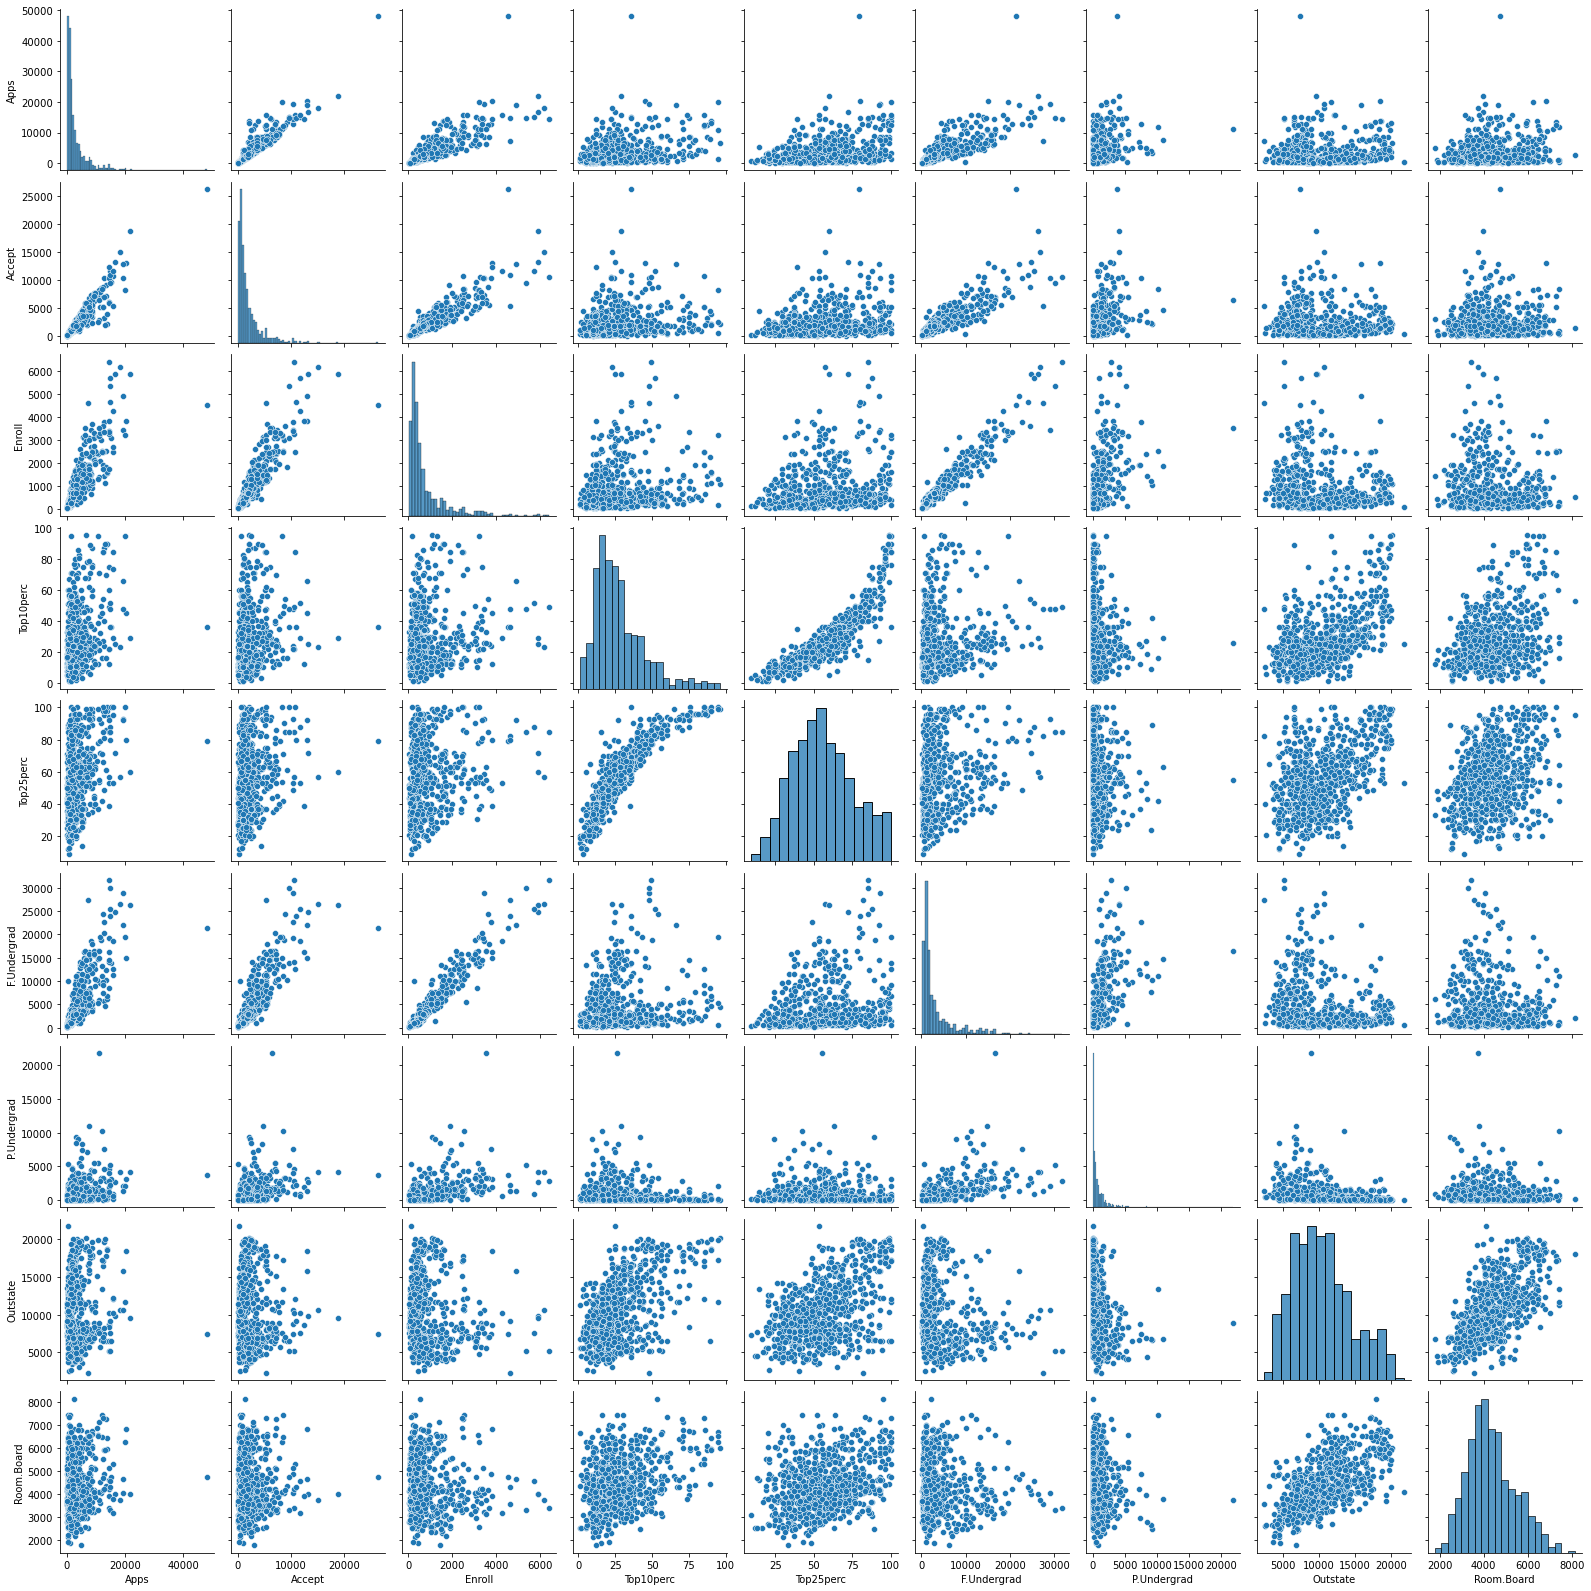

In [15]:
sns.pairplot(college.iloc[:,:10])

**C) iii. Use the plot() function to produce side-by-side boxplots of Outstate versus Private.**

[Text(0, 0.5, 'Out-of-state tuition (dollars)')]

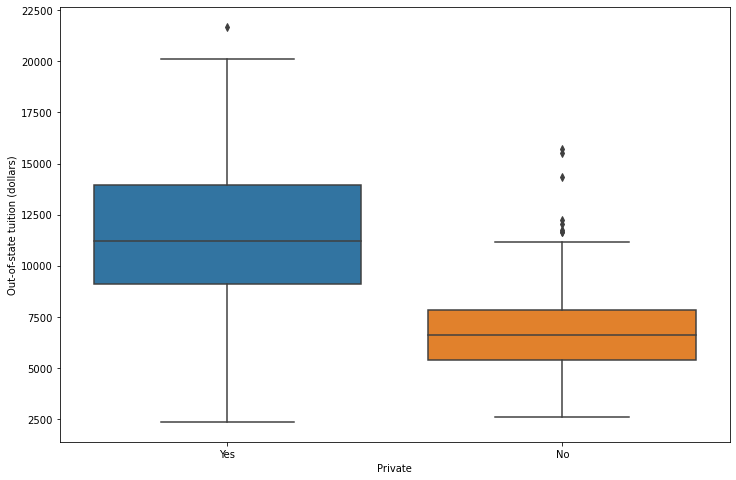

In [16]:
fig,ax = plt.subplots(figsize = (12,8))

sns.boxplot(data = college,x= 'Private',y = 'Outstate',ax = ax)

ax.set(ylabel = "Out-of-state tuition (dollars)")


**C) iv. Create a new qualitative variable, called `Elite`, by binning the `Top10perc` variable. We are going to divide universities into two groups based on whether or not the proportion of students coming from the top 10% of their high school
classes exceeds 50%. Use the summary() function to see how many elite universities there are. Now use the plot() function to produce side-by-side boxplots of Outstate versus Elite.**

In [19]:
# Create a new column called Elite and set the default value as "No"
college["Elite"] = "No"

college.loc[college["Top10perc"] > 50, "Elite"] = "Yes"

In [21]:
college.loc[college['Top25perc']>50,"Elite"] = 'Yes'

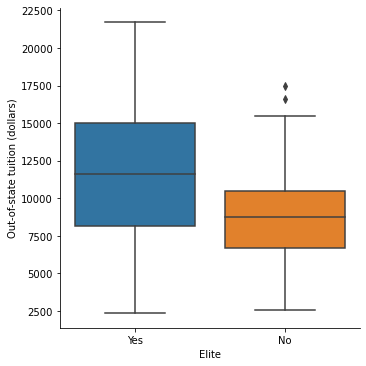

In [22]:
ax = sns.catplot(x = "Elite", y = "Outstate", kind = "box", order = ["Yes", "No"], data = college)
ax.set(ylabel = "Out-of-state tuition (dollars)")
plt.show()

**C) v. Use the hist() function to produce some histograms with differing numbers of bins for a few of the quantitative variables. You may find the command par(mfrow=c(2,2)) useful: it will divide the print window into four regions so that four
plots can be made simultaneously. Modifying the arguments to this function will divide the screen in other ways.**

C:\Users\amogg\Anaconda3\envs\ml\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0.98, 'Histograms of number of applicants by school type')

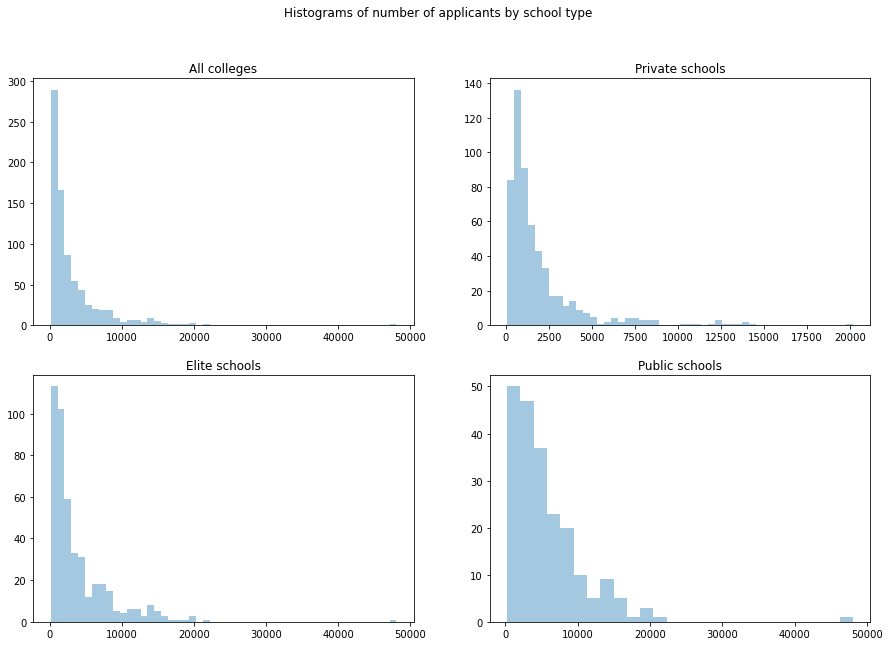

In [27]:
# Create grid of plots (fig)
# ax will be an array of four Axes objects
# Set the figure size so the plots aren't all squished together
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (15, 10))

# Create histogram for number of applicants across all colleges
sns.distplot(college["Apps"], kde = False, ax = axes[0, 0])
axes[0, 0].set(xlabel = "", title = "All colleges")

# Create histogram for number of applicants at private colleges
sns.distplot(college.loc[college["Private"] == "Yes", "Apps"], kde = False, ax = axes[0, 1])
axes[0, 1].set(xlabel = "", title = "Private schools")

# Create histogram for number of applicants at elite colleges
sns.distplot(college.loc[college["Elite"] == "Yes", "Apps"], kde = False, ax = axes[1, 0])
axes[1, 0].set(xlabel = "", title = "Elite schools")

# Create histogram for number of applicants at public colleges
sns.distplot(college.loc[college["Private"] == "No", "Apps"], kde = False, ax = axes[1, 1])
axes[1, 1].set(xlabel = "", title = "Public schools")

fig.suptitle("Histograms of number of applicants by school type")

### Applied Exercise 2
**This exercise involves the `Auto` data set studied in the lab. Make sure that the missing values have been removed from the data.**

**a) Which of the predictors are quantitative, and which are qualitative?**

In [28]:
auto = pd.read_csv('Data/auto.csv')

auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [30]:
auto.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower        int64
weight            int64
acceleration    float64
year              int64
origin            int64
name             object
dtype: object

The quanitative variable are:

- mpg
- displacement
- horsepower
- weight
- acceleration


Dependeing on the context, we may want to treat the following variables as qualitative:

- cylinders
- year
- origin
- name

**b) What is the range of each quantitative predictor? You can answer this using the range() function.**

In [35]:
auto_max = auto[['mpg','displacement','horsepower','weight','acceleration']].max()

auto_min = auto[['mpg','displacement','horsepower','weight','acceleration']].min()

auto_range = auto_max-auto_min

pd.DataFrame({'max':auto_max,'min':auto_min,'range':auto_range})

,max,min,range
mpg,46.6,9.0,37.6
displacement,455.0,68.0,387.0
horsepower,230.0,46.0,184.0
weight,5140.0,1613.0,3527.0
acceleration,24.8,8.0,16.8


**c) What is the mean and standard deviation of each quantitative predictor?**

In [36]:
auto_mean = auto[['mpg','displacement','horsepower','weight','acceleration']].mean()

auto_std = auto[['mpg','displacement','horsepower','weight','acceleration']].std()



pd.DataFrame({'mean':auto_mean,'std':auto_std})

,mean,std
mpg,23.445918,7.805007
displacement,194.411990,104.644004
horsepower,104.469388,38.491160
weight,2977.584184,849.402560
acceleration,15.541327,2.758864


**c) Now remove the 10th through 85th observations. What is the range, mean, and standard deviation of each predictor in the
subset of the data that remains?**

In [43]:
auto_adj = pd.concat([auto.iloc[:10],auto.iloc[85:]])

auto_adj_max = auto_adj[['mpg','displacement','horsepower','weight','acceleration']].max(axis = 0)
auto_adj_min = auto_adj[['mpg','displacement','horsepower','weight','acceleration']].min(axis = 0)
auto_adj_range = auto_adj_max - auto_adj_min
auto_adj_mean = auto_adj[['mpg','displacement','horsepower','weight','acceleration']].mean(axis = 0)
auto_adj_sd = auto_adj[['mpg','displacement','horsepower','weight','acceleration']].std(axis = 0)


# Generate a dataframe with the max, min, range, mean, and standard deviation for each quantitative variable
# Again note that the describe() function would provide all of these values except for the range
pd.DataFrame({"max":auto_adj_max, "min":auto_adj_min, "range":auto_adj_range, "mean":auto_adj_mean, "std dev":auto_adj_sd})

,max,min,range,mean,std dev
mpg,46.6,11.0,35.6,24.374763,7.872565
displacement,455.0,68.0,387.0,187.880126,100.169973
horsepower,230.0,46.0,184.0,101.003155,36.003208
weight,4997.0,1649.0,3348.0,2938.854890,811.640668
acceleration,24.8,8.5,16.3,15.704101,2.719913
